In [171]:
import numpy as np
import pandas as pd
import spacy
import re
import data_utils
import ast

In [172]:
nlp = spacy.load("en_core_web_lg")

In [216]:
train = pd.read_csv("train_data/train.csv")
overview = pd.read_csv("train_data/game_overview.csv")
test = pd.read_csv("test_data/test.csv")

In [174]:
train = pd.merge(train,overview,left_on='title',right_on='title')
train.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [218]:
test = pd.merge(test,overview,left_on='title',right_on='title')
test.head()

,review_id,title,year,user_review,developer,publisher,tags,overview
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B...","Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [176]:
overview_games = set(overview.title.unique())
test_games = set(test.title.unique())
train_games = set(train.title.unique())
print(train_games - overview_games)
print(test_games - overview_games)

set()
set()


In [177]:
def clean_the_corpus(dataframe,col_name):
    corpus = list(dataframe[col_name].values)
    text_sent = [data_utils.expand_contractions(sent) for sent in corpus]
    text_sent = [re.sub("http[s]*://[^\s]+"," ",text) for text in text_sent]
    text_sent = [data_utils.remove_accented_chars(sent) for sent in text_sent]
    text_sent = [re.sub("[-!\"#$%&'()*+,./:;<=>?@\][^_`|}{~']"," ",text) for text in text_sent]
    text_sent = [text.replace("\\"," ") for text in text_sent]
    text_sent = [re.sub(r'\s+', ' ',sent) for sent in text_sent]
    text_sent = list(map(str.lower,text_sent))
    docs = nlp.pipe(text_sent,disable=["ner","parser"])
    cleaned_corpus = []
    for doc in docs:
        doc_text = []
        for token in doc:
            if token.lemma_ != '-PRON-':
                doc_text.append(token.lemma_)
            else:
                doc_text.append(token.text)
        cleaned_corpus.append(doc_text)
    cleaned_corpus = [" ".join(cleaned_text) for cleaned_text in cleaned_corpus]
    return cleaned_corpus

In [178]:
def tag_cleaner(df,col_name):
    tags = df[col_name].values
    tags = [ast.literal_eval(tag) for tag in tags]
    tags = [" ".join(tag) for tag in tags]
    return np.array(tags)

In [179]:
#TRAIN
cleaned_title = clean_the_corpus(train,"title")
cleaned_user_review = clean_the_corpus(train, "user_review")
cleaned_tag = tag_cleaner(train,"tags")

(array([  60.,    0.,  132.,  843., 1310.,  107., 4711., 6988., 1088.,
        2255.]),
 array([ 9. , 11.3, 13.6, 15.9, 18.2, 20.5, 22.8, 25.1, 27.4, 29.7, 32. ]),
 <a list of 10 Patch objects>)

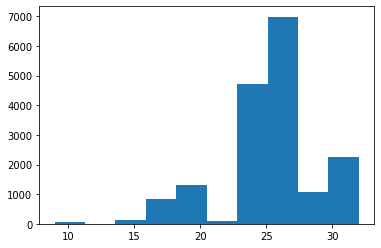

In [180]:
import matplotlib.pyplot as plt
no_of_elements = [len(tags.split()) for tags in cleaned_tag]
plt.hist(no_of_elements)

In [181]:
from collections import Counter
tags_string = " ".join(tags for tags in cleaned_tag)
tags = tags_string.split(" ")
tag_counter = Counter(tags)

In [182]:
best_35_tags = tag_counter.most_common()[60:95]
best_35_tags = list(map(lambda x:x[0], best_35_tags))
best_35_tags.remove('and')

In [183]:
tags_list = [tags.split(" ") for tags in cleaned_tag]

In [184]:
tags_that_matter = []
for tl in tags_list:
    tag_row = []
    for t in tl:
        if t in best_35_tags:
            tag_row.append(t)
    tags_that_matter.append(tag_row)

In [185]:
cleaned_tag = [" ".join(tag) for tag in tags_that_matter]

In [186]:
count_x = 0
count_y = 0
for t in cleaned_tag:
    if t == '': #This is what we are facing
        count_x +=1
    if t == ' ':
        count_y +=1

In [187]:
#train
cleaned_tag = cleaned_tag

In [188]:
train_cleaned = pd.DataFrame()
train_cleaned['title'] = cleaned_title
train_cleaned['user_review'] = cleaned_user_review
train_cleaned['tag'] = cleaned_tag
train_cleaned['year'] = train['year'].astype(str)
train_cleaned['user_suggestion'] = train['user_suggestion'].values

In [189]:
train_cleaned.head()

,title,user_review,tag,year,user_suggestion
0,spookys jump scare mansion,i be scared and hear creepy voice so i will pa...,Psychological Dark Walking Simulator Comedy,2016.0,1
1,spookys jump scare mansion,good game more well than sam peppers youtube a...,Psychological Dark Walking Simulator Comedy,2016.0,1
2,spookys jump scare mansion,a littly iffy on the control but once you know...,Psychological Dark Walking Simulator Comedy,2016.0,1
3,spookys jump scare mansion,great game fun and colorful and all that a sid...,Psychological Dark Walking Simulator Comedy,2015.0,1
4,spookys jump scare mansion,not many game have the cute tag right next to ...,Psychological Dark Walking Simulator Comedy,2015.0,1


In [190]:
train_cleaned['title'].isna().unique(),train_cleaned['user_review'].isna().unique(),train_cleaned['tag'].isna().unique()

(array([False]), array([False]), array([False]))

In [191]:
train_cleaned['new_user_review'] = train_cleaned['title'] + " " + train_cleaned['tag'] + " " +  train_cleaned['year'] + " " + train_cleaned['user_review']

In [192]:
train_cleaned = train_cleaned.loc[:,['new_user_review','user_suggestion']]

In [193]:
train_cleaned['new_user_review'] = train_cleaned['new_user_review'].apply(str.lower)
train_cleaned.columns = ['user_review','user_suggestion']

In [194]:
train_cleaned[train_cleaned['user_review'] == '']

,user_review,user_suggestion


In [195]:
train_cleaned[train_cleaned['user_review'] == ' ']

,user_review,user_suggestion


In [196]:
train_cleaned.to_csv("final_train.csv",index=False)

In [197]:
train_cleaned.head()

,user_review,user_suggestion
0,spookys jump scare mansion psychological dark ...,1
1,spookys jump scare mansion psychological dark ...,1
2,spookys jump scare mansion psychological dark ...,1
3,spookys jump scare mansion psychological dark ...,1
4,spookys jump scare mansion psychological dark ...,1


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train,X_test,y_train,y_test = train_test_split(train_cleaned.user_review.values,train_cleaned.user_suggestion.values,stratify=train_cleaned.user_suggestion.values,test_size=0.01)

In [200]:
train_dict = {'user_review':X_train,'user_suggestion':y_train}
train_json = pd.DataFrame(train_dict)
test_dict = {'user_review':X_test,'user_suggestion':y_test}
test_json = pd.DataFrame(test_dict)
train_json.loc[train_json['user_suggestion'] == 1,'user_suggestion'] = 'pos'
train_json.loc[train_json['user_suggestion'] == 0,'user_suggestion'] = 'neg'
test_json.loc[test_json['user_suggestion'] == 1,'user_suggestion'] = 'pos'
test_json.loc[test_json['user_suggestion'] == 0,'user_suggestion'] = 'neg'
train_json.to_csv("bert_train.csv",index=False)
test_json.to_csv("bert_val.csv",index=False)

In [220]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++TEST++++++++++++++++++++++++++++++++++++++++++++++++++++++#

In [219]:
#TEST
test_cleaned_title = clean_the_corpus(test,"title")
test_cleaned_user_review = clean_the_corpus(test, "user_review")
test_cleaned_tag = tag_cleaner(test,"tags")
test_review_id = test['review_id']

In [221]:
test_tags_list = [tags.split(" ") for tags in test_cleaned_tag]

In [222]:
test_tags_that_matter = []
for tl in test_tags_list:
    tag_row = []
    for t in tl:
        if t in best_35_tags:
            tag_row.append(t)
    test_tags_that_matter.append(tag_row)

In [223]:
test_cleaned_tag = [" ".join(tag) for tag in test_tags_that_matter]

In [225]:
test_cleaned = pd.DataFrame()
test_cleaned['review_id'] = test_review_id
test_cleaned['title'] = test_cleaned_title
test_cleaned['user_review'] = test_cleaned_user_review
test_cleaned['tag'] = test_cleaned_tag
test_cleaned['year'] = test['year'].astype(str)

In [226]:
test_cleaned.head()

,review_id,title,user_review,tag,year
0,1603,counter strike global offensive,nice graphic new map weapon and model but deve...,e-sports Difficult,2015.0
1,1604,counter strike global offensive,i would not recommend get into this at its cur...,e-sports Difficult,2018.0
2,1605,counter strike global offensive,edit 11 12 18i have try play cs go recently an...,e-sports Difficult,2018.0
3,1606,counter strike global offensive,the game be great but the community be the bad...,e-sports Difficult,2015.0
4,1607,counter strike global offensive,i thank trulyrazor for buy this for me a long ...,e-sports Difficult,2015.0


In [213]:
test_cleaned['new_user_review'] = test_cleaned['title'] + " " + test_cleaned['tag'] + " " +  test_cleaned['year'] + " " + test_cleaned['user_review']

In [214]:
test_cleaned.head()

,title,user_review,tag,year,new_user_review
0,counter strike global offensive,nice graphic new map weapon and model but deve...,e-sports Difficult,2015.0,counter strike global offensive e-sports Diffi...
1,counter strike global offensive,i would not recommend get into this at its cur...,e-sports Difficult,2018.0,counter strike global offensive e-sports Diffi...
2,counter strike global offensive,edit 11 12 18i have try play cs go recently an...,e-sports Difficult,2018.0,counter strike global offensive e-sports Diffi...
3,counter strike global offensive,the game be great but the community be the bad...,e-sports Difficult,2015.0,counter strike global offensive e-sports Diffi...
4,counter strike global offensive,i thank trulyrazor for buy this for me a long ...,e-sports Difficult,2015.0,counter strike global offensive e-sports Diffi...


In [215]:
test_cleaned = test_cleaned.loc[:,['review_id','new_user_review']]
test_cleaned['new_user_review'] = test_cleaned['new_user_review'].apply(str.lower)
test_cleaned.columns = ['review_id' , 'user_review']

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [168]:
test_cleaned[test_cleaned['user_review'] == '']

,user_review


In [169]:
test_cleaned[test_cleaned['user_review'] == ' ']

,user_review


In [201]:
test_cleaned.to_csv("final_test_sub.csv",index=False)

In [202]:
final25 = pd.read_csv("final_sub_25.csv")

In [205]:
final25.shape

(8045, 1)

In [204]:
test_cleaned

(8045, 1)

In [227]:
final25['review_id'] = test_cleaned['review_id']

In [232]:
final25 = final25.loc[:,['review_id','user_suggestion']]

In [233]:
final25.to_csv("upload_25_april.csv",index=False)

In [234]:
final25

,review_id,user_suggestion
0,1603,1
1,1604,0
2,1605,0
3,1606,0
4,1607,1
...,...,...
8040,25198,1
8041,25199,0
8042,25200,0
8043,25201,1
